# Final Project STAT 4185
## Nadia Alsubai
### **Updated: 12/11/2022**

In [3]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Question: 
### What are the key factors for determining the median value of a housing unit in a state?

# Data Collection

We will use government census data on each of the states (plus DC) to determine if there is any potential relationship between either of the stats and the median value of a housing unit in a state. To make our dataset, we need to web scrape through each of the individual state tables on the site (each table has a slightly different url depending on the state). So we will make a for-loop that interates through the list of postal codes. Regarding where to get each piece of data, we looked at the html of the site pages, and found that values were stored under the attribute "data-value" under the html tag "td." Fortunately, this was pretty consistent for each of the tables, regardless of state, so we were able to create a complete dataset without missing values.

In [ ]:
# list of state postal abbreviations
postals = ['AL','AK','AZ','AR','CA','CO', 'CT','DE','DC','FL', 'GA',
'HI', 'ID','IL', 'IN','IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
'MO','MT','NE','NV', 'NH','NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA',
'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']


base_url = 'https://www.census.gov/quickfacts/fact/table/'

state = []
pop_jul2021 = []
pop_under18 = []
pop_65_and_over = []
housing_unit_count_jul2021 = []
percent_owner_occupied_housing = []
median_value_of_housing_unit = []
median_monthly_owner_cost_w_mortgage = []
median_monthly_owner_cost_no_mortgage = []
high_school_grad_or_higher = []
bachelor_or_higher = []
percent_in_labor_force = []
median_household_income = []
per_capita_income_2020 = []
percent_poverty_2021 = []
total_employer_establishments = []
pop_per_square_mile_2020 = []
pop_per_square_mile_2010 = []
land_area_2020 = []

for post in postals:
    goto_link = base_url + post + '/PST045221'
    temp_page = requests.get(goto_link)
    temp_soup = bs(temp_page.content, 'html.parser')
    
    state.append(post)
    
    if (temp_soup.find_all('tbody')[1].find_all('td')[1]) == []:
        pop_jul2021.append('N/A')
    else:
        x = temp_soup.find_all('tbody')[1].find_all('td')[1]
        pop_jul2021.append(str(x.attrs.get('data-value')))

    if (temp_soup.find_all('tbody')[2].find_all('td')[3]) == []:
        pop_under18.append('N/A')
    else:
        x = (temp_soup.find_all('tbody')[2].find_all('td')[3])
        pop_under18.append(str(x.attrs.get('data-value')))

    if (temp_soup.find_all('tbody')[2].find_all('td')[5]) == []:
        pop_65_and_over.append('N/A')
    else:
        x = (temp_soup.find_all('tbody')[2].find_all('td')[5])
        pop_65_and_over.append(str(x.attrs.get('data-value')))

    if (temp_soup.find_all('tbody')[5].find_all('td')[1]) == []:
        housing_unit_count_jul2021.append('N/A')
    else:
        x = (temp_soup.find_all('tbody')[5].find_all('td')[1])
        housing_unit_count_jul2021.append(str(x.attrs.get('data-value')))

    if (temp_soup.find_all('tbody')[5].find_all('td')[3]) == []:
        percent_owner_occupied_housing.append('N/A')
    else:
        x = (temp_soup.find_all('tbody')[5].find_all('td')[3])
        percent_owner_occupied_housing.append(str(x.attrs.get('data-value')))

    if (temp_soup.find_all('tbody')[5].find_all('td')[5]) == []:
        median_value_of_housing_unit.append('N/A')
    else:
        x = (temp_soup.find_all('tbody')[5].find_all('td')[5])
        median_value_of_housing_unit.append(str(x.attrs.get('data-value')))

    if (temp_soup.find_all('tbody')[5].find_all('td')[7]) == []:
        median_monthly_owner_cost_w_mortgage.append('N/A')
    else:
        x = (temp_soup.find_all('tbody')[5].find_all('td')[7])
        median_monthly_owner_cost_w_mortgage.append(str(x.attrs.get('data-value')))

    if (temp_soup.find_all('tbody')[5].find_all('td')[9]) == []:
        median_monthly_owner_cost_no_mortgage.append('N/A')
    else:
        x = (temp_soup.find_all('tbody')[5].find_all('td')[9])
        median_monthly_owner_cost_no_mortgage.append(str(x.attrs.get('data-value')))

    if (temp_soup.find_all('tbody')[8].find_all('td')[1]) == []:
        high_school_grad_or_higher.append('N/A')
    else:
        x = temp_soup.find_all('tbody')[8].find_all('td')[1]
        high_school_grad_or_higher.append(str(x.attrs.get('data-value')))

    if (temp_soup.find_all('tbody')[8].find_all('td')[3]) == []:
        bachelor_or_higher.append('N/A')
    else:
        x = temp_soup.find_all('tbody')[8].find_all('td')[3]
        bachelor_or_higher.append(str(x.attrs.get('data-value')))

    if (temp_soup.find_all('tbody')[10].find_all('td')[1]) == []:
        percent_in_labor_force.append('N/A')
    else:
        x = temp_soup.find_all('tbody')[10].find_all('td')[1]
        percent_in_labor_force.append(str(x.attrs.get('data-value')))

    if (temp_soup.find_all('tbody')[12].find_all('td')[1]) == []:
        median_household_income.append('N/A')
    else:
        x = temp_soup.find_all('tbody')[12].find_all('td')[1]
        median_household_income.append(str(x.attrs.get('data-value')))

    if (temp_soup.find_all('tbody')[12].find_all('td')[3]) == []:
        per_capita_income_2020.append('N/A')
    else:
        x = temp_soup.find_all('tbody')[12].find_all('td')[3]
        per_capita_income_2020.append(str(x.attrs.get('data-value')))

    if (temp_soup.find_all('tbody')[12].find_all('td')[5]) == []:
        percent_poverty_2021.append('N/A')
    else:
        x = temp_soup.find_all('tbody')[12].find_all('td')[5]
        percent_poverty_2021.append(str(x.attrs.get('data-value')))

    if (temp_soup.find_all('tbody')[13].find_all('td')[1]) == []:
        total_employer_establishments.append('N/A')
    else:
        x = temp_soup.find_all('tbody')[13].find_all('td')[1]
        total_employer_establishments.append(str(x.attrs.get('data-value')))

    if (temp_soup.find_all('tbody')[14].find_all('td')[1]) == []:
        pop_per_square_mile_2020.append('N/A')
    else:
        x = temp_soup.find_all('tbody')[14].find_all('td')[1]
        pop_per_square_mile_2020.append(str(x.attrs.get('data-value')))
    
    if (temp_soup.find_all('tbody')[14].find_all('td')[3]) == []:
        pop_per_square_mile_2010.append('N/A')
    else:
        x = temp_soup.find_all('tbody')[14].find_all('td')[3]
        pop_per_square_mile_2010.append(str(x.attrs.get('data-value')))

    if (temp_soup.find_all('tbody')[14].find_all('td')[5]) == []:
        land_area_2020.append('N/A')
    else:
        x = temp_soup.find_all('tbody')[14].find_all('td')[5]
        land_area_2020.append(str(x.attrs.get('data-value')))


In [7]:
state_arr = np.array(state)
pop_jul2021_arr = np.array(pop_jul2021)
pop_under18_arr = np.array(pop_under18)
pop_65_and_over_arr = np.array(pop_65_and_over)
housing_unit_count_jul2021_arr = np.array(housing_unit_count_jul2021)
percent_owner_occupied_housing_arr = np.array(percent_owner_occupied_housing)
median_value_of_housing_unit_arr = np.array(median_value_of_housing_unit)
median_monthly_owner_cost_w_mortgage_arr = np.array(median_monthly_owner_cost_w_mortgage)
median_monthly_owner_cost_no_mortgage_arr = np.array(median_monthly_owner_cost_no_mortgage)
high_school_grad_or_higher_arr = np.array(high_school_grad_or_higher)
bachelor_or_higher_arr = np.array(bachelor_or_higher)
percent_in_labor_force_arr = np.array(percent_in_labor_force)
median_household_income_arr = np.array(median_household_income)
per_capita_income_2020_arr = np.array(per_capita_income_2020)
percent_poverty_2021_arr = np.array(percent_poverty_2021)
total_employer_establishments_arr = np.array(total_employer_establishments)
pop_per_square_mile_2020_arr = np.array(pop_per_square_mile_2020)
pop_per_square_mile_2010_arr = np.array(pop_per_square_mile_2010)
land_area_2020_arr = np.array(land_area_2020)

In [8]:
state_df = pd.DataFrame({'state':state_arr, 'pop_jul2021': pop_jul2021_arr, 'pop_under18':pop_under18_arr, 'pop_65_and_over':pop_65_and_over_arr,
'housing_unit_count_jul2021':housing_unit_count_jul2021_arr, 'percent_owner_occupied_housing':percent_owner_occupied_housing_arr,
'median_value_of_housing_unit':median_value_of_housing_unit_arr, 'median_monthly_owner_cost_w_mortgage': median_monthly_owner_cost_w_mortgage_arr,
'median_monthly_owner_cost_no_mortgage':median_monthly_owner_cost_no_mortgage_arr, 'high_school_grad_or_higher': high_school_grad_or_higher_arr,
'bachelor_or_higher':bachelor_or_higher_arr, 'percent_in_labor_force':percent_in_labor_force_arr, 'median_household_income': median_household_income_arr,
'per_capita_income_2020':per_capita_income_2020_arr, 'percent_poverty_2021':percent_poverty_2021_arr, 'total_employer_establishments':total_employer_establishments_arr,
'pop_per_square_mile_2020':pop_per_square_mile_2020_arr, 'pop_per_square_mile_2010':pop_per_square_mile_2010_arr, 'land_area_2020':land_area_2020_arr})

In [ ]:
state_df.head()

In [ ]:
state_df.to_csv('states_dataset_notclean.csv')

# Data Cleaning

In [ ]:
state_df = pd.read_csv(r'states_dataset_notclean.csv')

In [ ]:
state_df.dtypes

Unnamed: 0                                 int64
state                                     object
pop_jul2021                                int64
pop_under18                              float64
pop_65_and_over                          float64
housing_unit_count_jul2021                 int64
percent_owner_occupied_housing           float64
median_value_of_housing_unit               int64
median_monthly_owner_cost_w_mortgage       int64
median_monthly_owner_cost_no_mortgage      int64
high_school_grad_or_higher               float64
bachelor_or_higher                       float64
percent_in_labor_force                   float64
median_household_income                    int64
per_capita_income_2020                     int64
percent_poverty_2021                     float64
total_employer_establishments              int64
pop_per_square_mile_2020                 float64
pop_per_square_mile_2010                 float64
land_area_2020                           float64
dtype: object

In [ ]:
state_df.drop(['Unnamed: 0'], axis=1, inplace=True)
state_df.head()

state  pop_jul2021  pop_under18  pop_65_and_over  \
0    AL      5039877         22.3             17.6   
1    AK       732673         24.5             13.3   
2    AZ      7276316         22.2             18.3   
3    AR      3025891         23.2             17.5   
4    CA     39237836         22.4             15.2   

   housing_unit_count_jul2021  percent_owner_occupied_housing  \
0                     2313642                            69.2   
1                      327890                            64.8   
2                     3138871                            65.3   
3                     1380728                            65.8   
4                    14512281                            55.3   

   median_value_of_housing_unit  median_monthly_owner_cost_w_mortgage  \
0                        149600                                  1196   
1                        275600                                  1937   
2                        242000                                  1464   
3                        133600                                  1103   
4                        538500                                  2422   

   median_monthly_owner_cost_no_mortgage  high_school_grad_or_higher  \
0                                    367                        86.9   
1                                    591                        93.1   
2                                    430                        87.9   
3                                    353                        87.2   
4                                    618                        83.9   

   bachelor_or_higher  percent_in_labor_force  median_household_income  \
0                26.2                    57.2                    52035   
1                30.0                    64.2                    77790   
2                30.3                    59.7                    61529   
3                23.8                    57.8                    49475   
4                34.7                    63.3                    78672   

   per_capita_income_2020  percent_poverty_2021  \
0                   28934                  16.1   
1                   37094                  10.5   
2                   32340                  12.8   
3                   27724                  16.3   
4                   38576                  12.3   

   total_employer_establishments  pop_per_square_mile_2020  \
0                         100955                      99.2   
1                          21184                       1.3   
2                         149829                      62.9   
3                          67586                      57.9   
4                         981369                     253.7   

   pop_per_square_mile_2010  land_area_2020  
0                      94.4        50647.13  
1                       1.2       571022.38  
2                      56.3       113653.42  
3                      56.0        51992.85  
4                     239.1       155858.33

In [ ]:
state_df.isnull().sum() #No empty cells. Good.

state                                    0
pop_jul2021                              0
pop_under18                              0
pop_65_and_over                          0
housing_unit_count_jul2021               0
percent_owner_occupied_housing           0
median_value_of_housing_unit             0
median_monthly_owner_cost_w_mortgage     0
median_monthly_owner_cost_no_mortgage    0
high_school_grad_or_higher               0
bachelor_or_higher                       0
percent_in_labor_force                   0
median_household_income                  0
per_capita_income_2020                   0
percent_poverty_2021                     0
total_employer_establishments            0
pop_per_square_mile_2020                 0
pop_per_square_mile_2010                 0
land_area_2020                           0
dtype: int64

In [ ]:
(state_df.values == 'N/A').sum()  #checks if 'N/A' is anywhere

0

In [ ]:
#covert all columns except for the states one into float values (float64)

state_df = state_df.astype({'pop_jul2021':'float64','housing_unit_count_jul2021':'float64',
'median_value_of_housing_unit':'float64', 'median_monthly_owner_cost_w_mortgage':'float64',
'median_monthly_owner_cost_no_mortgage':'float64', 'median_household_income':'float64',
'per_capita_income_2020':'float64', 'total_employer_establishments':'float64', 'state':'string'})

In [ ]:
state_df.dtypes

state                                     string
pop_jul2021                              float64
pop_under18                              float64
pop_65_and_over                          float64
housing_unit_count_jul2021               float64
percent_owner_occupied_housing           float64
median_value_of_housing_unit             float64
median_monthly_owner_cost_w_mortgage     float64
median_monthly_owner_cost_no_mortgage    float64
high_school_grad_or_higher               float64
bachelor_or_higher                       float64
percent_in_labor_force                   float64
median_household_income                  float64
per_capita_income_2020                   float64
percent_poverty_2021                     float64
total_employer_establishments            float64
pop_per_square_mile_2020                 float64
pop_per_square_mile_2010                 float64
land_area_2020                           float64
dtype: object

In [ ]:
state_df.rename(columns= {'state':'State', 'pop_jul2021':'Population_July2021_Percent', 'pop_under18':'Population_Under18_Percent', 
'pop_65_and_over':'Population_65_and_Over_Percent', 'housing_unit_count_jul2021':'Housing_Unit_Count_July2021', 'percent_owner_occupied_housing':'Owner_Occupied_Housing_Unit_Rate_Percent',
'median_value_of_housing_unit':'Median_Value_of_Owner_Occupied_Housing_Unit','median_monthly_owner_cost_w_mortgage':'Median_Monthly_OwnerOccupied_Cost_w_Mortgage',
'median_monthly_owner_cost_no_mortgage':'Median_Monthly_OwnerOccupied_Cost_No_Mortgage','high_school_grad_or_higher':'High_School_Grad_Or_Higher_Percent',
'bachelor_or_higher':'Bachelor_Or_Higher_Percent', 'percent_in_labor_force':'Percent_in_Labor_Force_2016to2020','median_household_income':'Median_Household_Income_2020',
'per_capita_income_2020':'Per_Capita_Income_2020','percent_poverty_2021':'Percent_Poverty_2021', 'total_employer_establishments':'Total_Employer_Establishments_2020',
'pop_per_square_mile_2020':'Population_per_Square_Mile_2020','pop_per_square_mile_2010':'Population_per_Square_Mile_2010','land_area_2020':'Land_Area_in_Square_Miles_2020'}, inplace=True)

In [ ]:
state_df.head() 

State  Population_July2021_Percent  Population_Under18_Percent  \
0    AL                    5039877.0                        22.3   
1    AK                     732673.0                        24.5   
2    AZ                    7276316.0                        22.2   
3    AR                    3025891.0                        23.2   
4    CA                   39237836.0                        22.4   

   Population_65_and_Over_Percent  Housing_Unit_Count_July2021  \
0                            17.6                    2313642.0   
1                            13.3                     327890.0   
2                            18.3                    3138871.0   
3                            17.5                    1380728.0   
4                            15.2                   14512281.0   

   Owner_Occupied_Housing_Unit_Rate_Percent  \
0                                      69.2   
1                                      64.8   
2                                      65.3   
3                                      65.8   
4                                      55.3   

   Median_Value_of_Owner_Occupied_Housing_Unit  \
0                                     149600.0   
1                                     275600.0   
2                                     242000.0   
3                                     133600.0   
4                                     538500.0   

   Median_Monthly_OwnerOccupied_Cost_w_Mortgage  \
0                                        1196.0   
1                                        1937.0   
2                                        1464.0   
3                                        1103.0   
4                                        2422.0   

   Median_Monthly_OwnerOccupied_Cost_No_Mortgage  \
0                                          367.0   
1                                          591.0   
2                                          430.0   
3                                          353.0   
4                                          618.0   

   High_School_Grad_Or_Higher_Percent  Bachelor_Or_Higher_Percent  \
0                                86.9                        26.2   
1                                93.1                        30.0   
2                                87.9                        30.3   
3                                87.2                        23.8   
4                                83.9                        34.7   

   Percent_in_Labor_Force_2016to2020  Median_Household_Income_2020  \
0                               57.2                       52035.0   
1                               64.2                       77790.0   
2                               59.7                       61529.0   
3                               57.8                       49475.0   
4                               63.3                       78672.0   

   Per_Capita_Income_2020  Percent_Poverty_2021  \
0                 28934.0                  16.1   
1                 37094.0                  10.5   
2                 32340.0                  12.8   
3                 27724.0                  16.3   
4                 38576.0                  12.3   

   Total_Employer_Establishments_2020  Population_per_Square_Mile_2020  \
0                            100955.0                             99.2   
1                             21184.0                              1.3   
2                            149829.0                             62.9   
3                             67586.0                             57.9   
4                            981369.0                            253.7   

   Population_per_Square_Mile_2010  Land_Area_in_Square_Miles_2020  
0                             94.4                        50647.13  
1                              1.2                       571022.38  
2                             56.3                       113653.42  
3                             56.0                        51992.85  
4                            239.1                       15

In [ ]:
state_df.to_csv("cleaned_states_dataset.csv")

# Data Visualization

In [4]:
state_df = pd.read_csv("cleaned_states_dataset.csv")

In [5]:
state_df.describe() #descriptive stats

Unnamed: 0  Population_July2021_Percent  Population_Under18_Percent  \
count   51.000000                 5.100000e+01                   51.000000   
mean    25.000000                 6.507720e+06                   22.060784   
std     14.866069                 7.397955e+06                    1.963067   
min      0.000000                 5.788030e+05                   18.100000   
25%     12.500000                 1.841941e+06                   20.950000   
50%     25.000000                 4.509394e+06                   22.100000   
75%     37.500000                 7.507504e+06                   23.250000   
max     50.000000                 3.923784e+07                   28.400000   

       Population_65_and_Over_Percent  Housing_Unit_Count_July2021  \
count                       51.000000                 5.100000e+01   
mean                        17.264706                 2.787314e+06   
std                          2.014331                 2.961878e+06   
min                         11.700000                 2.743710e+05   
25%                         16.400000                 8.147975e+05   
50%                         17.400000                 2.008239e+06   
75%                         18.200000                 3.198028e+06   
max                         21.700000                 1.451228e+07   

       Owner_Occupied_Housing_Unit_Rate_Percent  \
count                                 51.000000   
mean                                  66.096078   
std                                    5.360185   
min                                   42.500000   
25%                                   64.400000   
50%                                   66.500000   
75%                                   69.350000   
max                                   73.700000   

       Median_Value_of_Owner_Occupied_Housing_Unit  \
count                                    51.000000   
mean                                 244603.921569   
std                                  113920.672331   
min                                  123200.000000   
25%                                  166050.000000   
50%                                  202100.000000   
75%                                  281250.000000   
max                                  636400.000000   

       Median_Monthly_OwnerOccupied_Cost_w_Mortgage  \
count                                     51.000000   
mean                                    1597.941176   
std                                      393.891021   
min                                     1058.000000   
25%                                     1301.500000   
50%                                     1464.000000   
75%                                     1815.000000   
max                                     2676.000000   

       Median_Monthly_OwnerOccupied_Cost_No_Mortgage  \
count                                      51.000000   
mean                                      525.490196   
std                                       155.350104   
min                                       331.000000   
25%                                       422.500000   
50%                                       495.000000   
75%                                       573.500000   
max                                      1062.000000   

       High_School_Grad_Or_Higher_Percent  Bachelor_Or_Higher_Percent  \
count                           51.000000                   51.000000   
mean                            90.072549                   32.545098   
std                              2.614351                    6.492190   
min                             83.900000                   21.300000   
25%                             88.050000                   28.800000   
50%                             90.600000                   32.000000   
75%                             92.150000                   35.250000   
max                             94.000000                   59.800000   

       Percent_in_Labor_Force_2016to2020  Median_Household_Income_2

In [5]:
state_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [7]:
state_df.describe()

Population_July2021_Percent  Population_Under18_Percent  \
count                 5.100000e+01                   51.000000   
mean                  6.507720e+06                   22.060784   
std                   7.397955e+06                    1.963067   
min                   5.788030e+05                   18.100000   
25%                   1.841941e+06                   20.950000   
50%                   4.509394e+06                   22.100000   
75%                   7.507504e+06                   23.250000   
max                   3.923784e+07                   28.400000   

       Population_65_and_Over_Percent  Housing_Unit_Count_July2021  \
count                       51.000000                 5.100000e+01   
mean                        17.264706                 2.787314e+06   
std                          2.014331                 2.961878e+06   
min                         11.700000                 2.743710e+05   
25%                         16.400000                 8.147975e+05   
50%                         17.400000                 2.008239e+06   
75%                         18.200000                 3.198028e+06   
max                         21.700000                 1.451228e+07   

       Owner_Occupied_Housing_Unit_Rate_Percent  \
count                                 51.000000   
mean                                  66.096078   
std                                    5.360185   
min                                   42.500000   
25%                                   64.400000   
50%                                   66.500000   
75%                                   69.350000   
max                                   73.700000   

       Median_Value_of_Owner_Occupied_Housing_Unit  \
count                                    51.000000   
mean                                 244603.921569   
std                                  113920.672331   
min                                  123200.000000   
25%                                  166050.000000   
50%                                  202100.000000   
75%                                  281250.000000   
max                                  636400.000000   

       Median_Monthly_OwnerOccupied_Cost_w_Mortgage  \
count                                     51.000000   
mean                                    1597.941176   
std                                      393.891021   
min                                     1058.000000   
25%                                     1301.500000   
50%                                     1464.000000   
75%                                     1815.000000   
max                                     2676.000000   

       Median_Monthly_OwnerOccupied_Cost_No_Mortgage  \
count                                      51.000000   
mean                                      525.490196   
std                                       155.350104   
min                                       331.000000   
25%                                       422.500000   
50%                                       495.000000   
75%                                       573.500000   
max                                      1062.000000   

       High_School_Grad_Or_Higher_Percent  Bachelor_Or_Higher_Percent  \
count                           51.000000                   51.000000   
mean                            90.072549                   32.545098   
std                              2.614351                    6.492190   
min                             83.900000                   21.300000   
25%                             88.050000                   28.800000   
50%                             90.600000                   32.000000   
75%                             92.150000                   35.250000   
max                             94.000000                   59.800000   

       Percent_in_Labor_Force_2016to2020  Median_Household_Income_2020  \
count                          51.000000                     51.000000   
mean                       

C:\Users\nadia\AppData\Local\Temp\ipykernel_24796\1526909774.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(state_df.corr())


<AxesSubplot:>

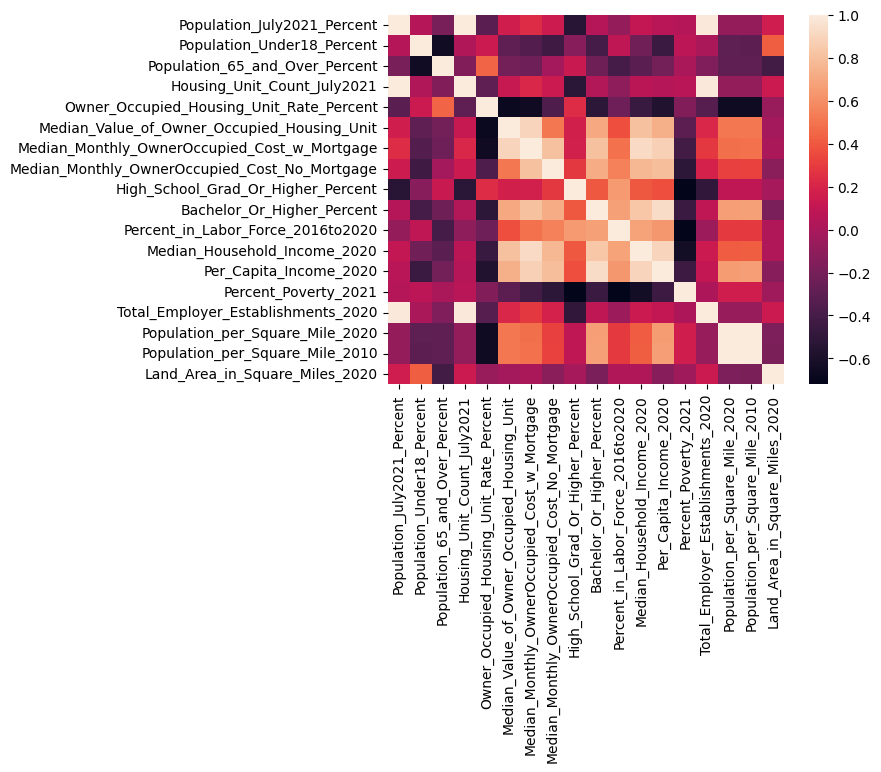

In [8]:
sns.heatmap(state_df.corr())

The above heatmap suggests these factors correlate with median housing unit value:
<br>
<br>
**Owner-Occupied Housing Rate** --> Negative Correlation
<br>
**Population Under 18** --> Possible Negative Correlation
<br>
**Poverty Rate** --> Possible Negative Correlation
<br>
**Median Monthly Owner-Occupied Cost with Mortgage** --> Positive Correlation
<br>
**Median Household Income** --> Possible Positive Correlation
<br>
**Per Capita Income** --> Possible Positive Correlation
<br>
**Bachelor or Higher** --> Possible Correlation
<br>
**Population Per Square Mile in 2020** --> Possible Correlation




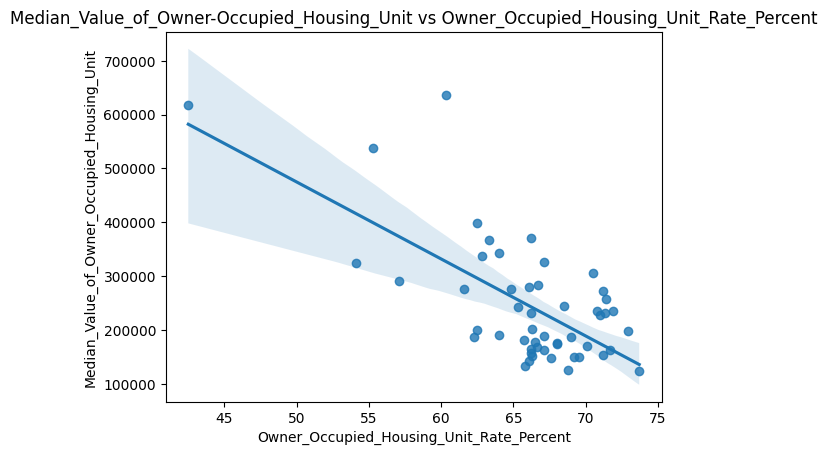

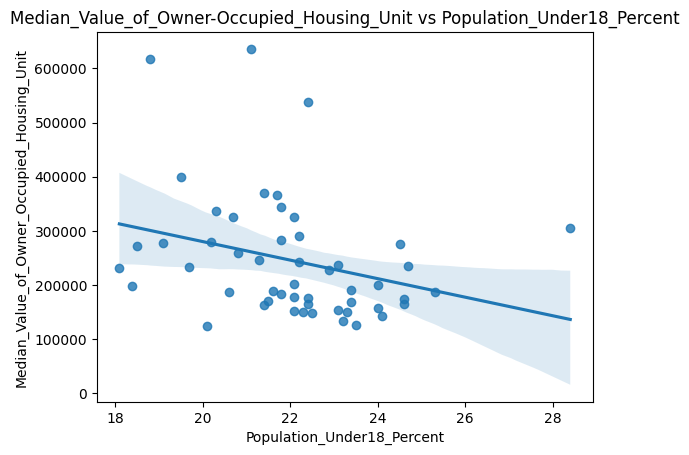

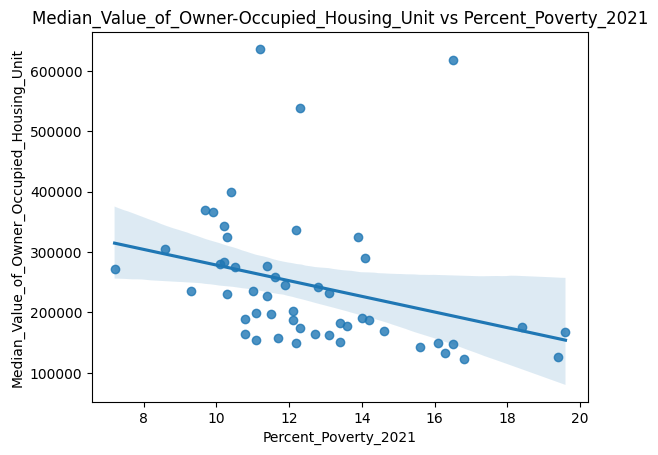

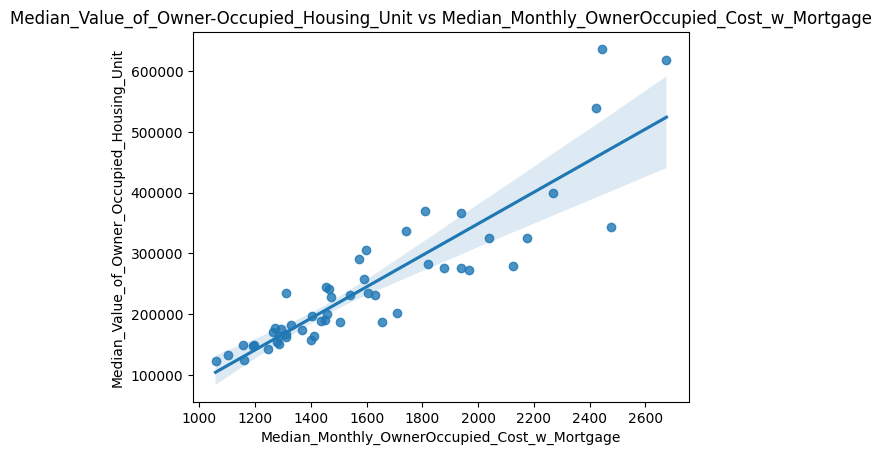

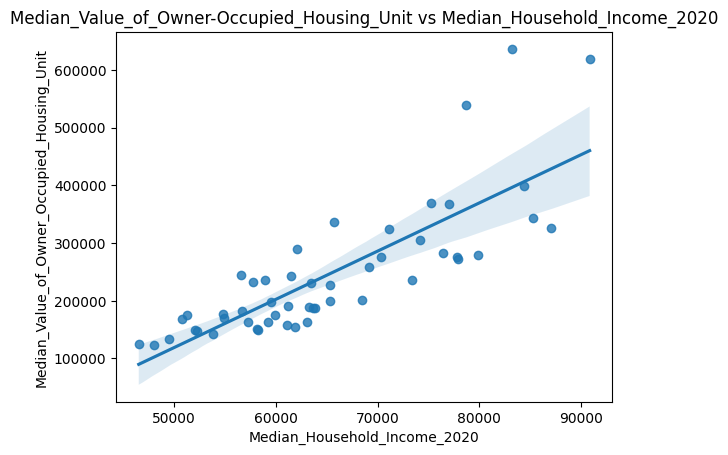

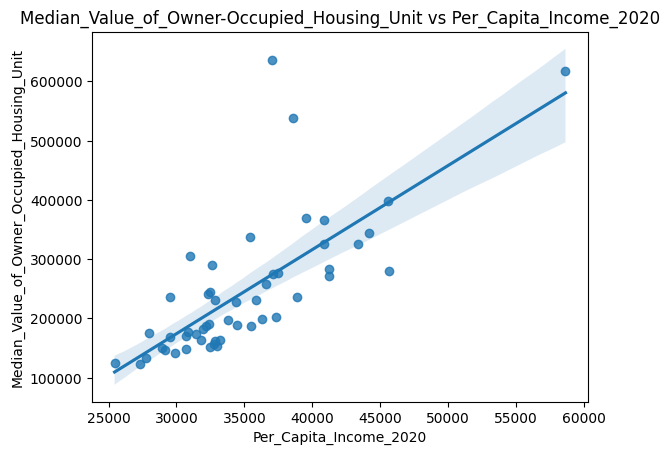

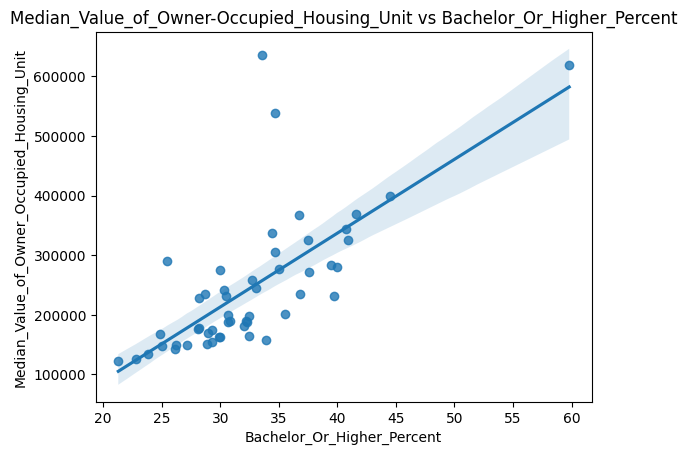

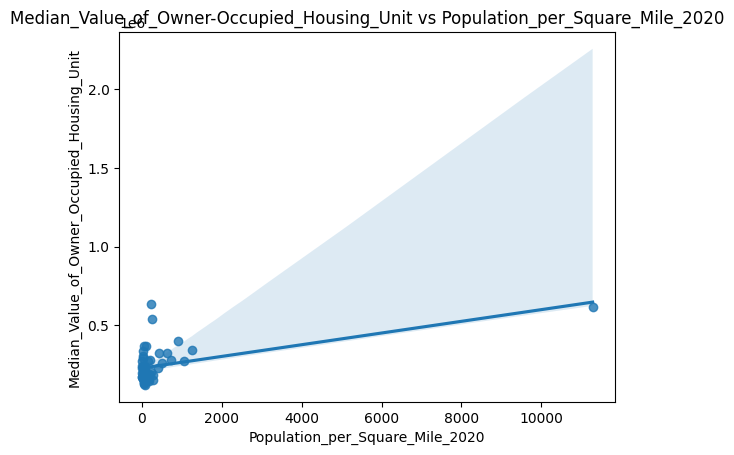

In [9]:
#will construct scatterplots for the above factors that were selected based on the heatmap

factors = ["Owner_Occupied_Housing_Unit_Rate_Percent","Population_Under18_Percent","Percent_Poverty_2021",
"Median_Monthly_OwnerOccupied_Cost_w_Mortgage","Median_Household_Income_2020","Per_Capita_Income_2020",
"Bachelor_Or_Higher_Percent","Population_per_Square_Mile_2020"]

for factor in factors:
    sns.regplot(x=factor, y="Median_Value_of_Owner_Occupied_Housing_Unit", data = state_df)
    plt.title("Median_Value_of_Owner-Occupied_Housing_Unit vs "+ factor)
    plt.show()






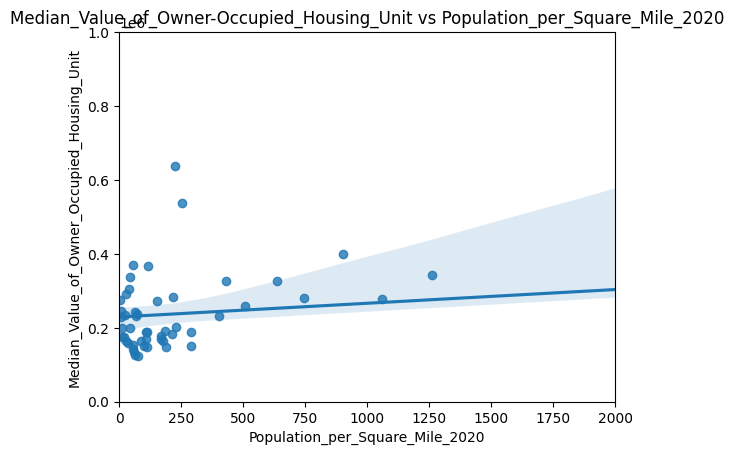

In [10]:
#reducing the ranges of x and y axes to exclude outlier in the pop square mile plot above

sns.regplot(x="Population_per_Square_Mile_2020", y="Median_Value_of_Owner_Occupied_Housing_Unit", data = state_df)
plt.title("Median_Value_of_Owner-Occupied_Housing_Unit vs Population_per_Square_Mile_2020")
plt.xlim(0, 2000)
plt.ylim(0, 1000000)
plt.show()

# Data Modeling

In [6]:
df_copy = state_df.copy()

In [6]:
df_copy.head()  #verifying there's no unnamed column

State  Population_July2021_Percent  Population_Under18_Percent  \
0    AL                    5039877.0                        22.3   
1    AK                     732673.0                        24.5   
2    AZ                    7276316.0                        22.2   
3    AR                    3025891.0                        23.2   
4    CA                   39237836.0                        22.4   

   Population_65_and_Over_Percent  Housing_Unit_Count_July2021  \
0                            17.6                    2313642.0   
1                            13.3                     327890.0   
2                            18.3                    3138871.0   
3                            17.5                    1380728.0   
4                            15.2                   14512281.0   

   Owner_Occupied_Housing_Unit_Rate_Percent  \
0                                      69.2   
1                                      64.8   
2                                      65.3   
3                                      65.8   
4                                      55.3   

   Median_Value_of_Owner_Occupied_Housing_Unit  \
0                                     149600.0   
1                                     275600.0   
2                                     242000.0   
3                                     133600.0   
4                                     538500.0   

   Median_Monthly_OwnerOccupied_Cost_w_Mortgage  \
0                                        1196.0   
1                                        1937.0   
2                                        1464.0   
3                                        1103.0   
4                                        2422.0   

   Median_Monthly_OwnerOccupied_Cost_No_Mortgage  \
0                                          367.0   
1                                          591.0   
2                                          430.0   
3                                          353.0   
4                                          618.0   

   High_School_Grad_Or_Higher_Percent  Bachelor_Or_Higher_Percent  \
0                                86.9                        26.2   
1                                93.1                        30.0   
2                                87.9                        30.3   
3                                87.2                        23.8   
4                                83.9                        34.7   

   Percent_in_Labor_Force_2016to2020  Median_Household_Income_2020  \
0                               57.2                       52035.0   
1                               64.2                       77790.0   
2                               59.7                       61529.0   
3                               57.8                       49475.0   
4                               63.3                       78672.0   

   Per_Capita_Income_2020  Percent_Poverty_2021  \
0                 28934.0                  16.1   
1                 37094.0                  10.5   
2                 32340.0                  12.8   
3                 27724.0                  16.3   
4                 38576.0                  12.3   

   Total_Employer_Establishments_2020  Population_per_Square_Mile_2020  \
0                            100955.0                             99.2   
1                             21184.0                              1.3   
2                            149829.0                             62.9   
3                             67586.0                             57.9   
4                            981369.0                            253.7   

   Population_per_Square_Mile_2010  Land_Area_in_Square_Miles_2020  
0                             94.4                        50647.13  
1                              1.2                       571022.38  
2                             56.3                       113653.42  
3                             56.0                        51992.85  
4                            239.1                       15

In [7]:
pd.set_option('display.max_columns', None) #allows all columns to be printed out. can see name in full of each column if need be

In [14]:
df_copy.head()

State  Population_July2021_Percent  Population_Under18_Percent  \
0    AL                    5039877.0                        22.3   
1    AK                     732673.0                        24.5   
2    AZ                    7276316.0                        22.2   
3    AR                    3025891.0                        23.2   
4    CA                   39237836.0                        22.4   

   Population_65_and_Over_Percent  Housing_Unit_Count_July2021  \
0                            17.6                    2313642.0   
1                            13.3                     327890.0   
2                            18.3                    3138871.0   
3                            17.5                    1380728.0   
4                            15.2                   14512281.0   

   Owner_Occupied_Housing_Unit_Rate_Percent  \
0                                      69.2   
1                                      64.8   
2                                      65.3   
3                                      65.8   
4                                      55.3   

   Median_Value_of_Owner_Occupied_Housing_Unit  \
0                                     149600.0   
1                                     275600.0   
2                                     242000.0   
3                                     133600.0   
4                                     538500.0   

   Median_Monthly_OwnerOccupied_Cost_w_Mortgage  \
0                                        1196.0   
1                                        1937.0   
2                                        1464.0   
3                                        1103.0   
4                                        2422.0   

   Median_Monthly_OwnerOccupied_Cost_No_Mortgage  \
0                                          367.0   
1                                          591.0   
2                                          430.0   
3                                          353.0   
4                                          618.0   

   High_School_Grad_Or_Higher_Percent  Bachelor_Or_Higher_Percent  \
0                                86.9                        26.2   
1                                93.1                        30.0   
2                                87.9                        30.3   
3                                87.2                        23.8   
4                                83.9                        34.7   

   Percent_in_Labor_Force_2016to2020  Median_Household_Income_2020  \
0                               57.2                       52035.0   
1                               64.2                       77790.0   
2                               59.7                       61529.0   
3                               57.8                       49475.0   
4                               63.3                       78672.0   

   Per_Capita_Income_2020  Percent_Poverty_2021  \
0                 28934.0                  16.1   
1                 37094.0                  10.5   
2                 32340.0                  12.8   
3                 27724.0                  16.3   
4                 38576.0                  12.3   

   Total_Employer_Establishments_2020  Population_per_Square_Mile_2020  \
0                            100955.0                             99.2   
1                             21184.0                              1.3   
2                            149829.0                             62.9   
3                             67586.0                             57.9   
4                            981369.0                            253.7   

   Population_per_Square_Mile_2010  Land_Area_in_Square_Miles_2020  
0                             94.4                        50647.13  
1                              1.2                       571022.38  
2                             56.3                       113653.42  
3                             56.0                        51992.85  
4                            239.1                       15

In [8]:
#count number of columns

shape = df_copy.shape
print(shape[1])

#19 columns. But only need a sub dataframe with columns indexed 1 to 18

19


In [8]:
df_copy_sub = df_copy.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
#excludes states column

In [9]:
df_copy_sub.head()

Population_July2021_Percent  Population_Under18_Percent  \
0                    5039877.0                        22.3   
1                     732673.0                        24.5   
2                    7276316.0                        22.2   
3                    3025891.0                        23.2   
4                   39237836.0                        22.4   

   Population_65_and_Over_Percent  Housing_Unit_Count_July2021  \
0                            17.6                    2313642.0   
1                            13.3                     327890.0   
2                            18.3                    3138871.0   
3                            17.5                    1380728.0   
4                            15.2                   14512281.0   

   Owner_Occupied_Housing_Unit_Rate_Percent  \
0                                      69.2   
1                                      64.8   
2                                      65.3   
3                                      65.8   
4                                      55.3   

   Median_Value_of_Owner_Occupied_Housing_Unit  \
0                                     149600.0   
1                                     275600.0   
2                                     242000.0   
3                                     133600.0   
4                                     538500.0   

   Median_Monthly_OwnerOccupied_Cost_w_Mortgage  \
0                                        1196.0   
1                                        1937.0   
2                                        1464.0   
3                                        1103.0   
4                                        2422.0   

   Median_Monthly_OwnerOccupied_Cost_No_Mortgage  \
0                                          367.0   
1                                          591.0   
2                                          430.0   
3                                          353.0   
4                                          618.0   

   High_School_Grad_Or_Higher_Percent  Bachelor_Or_Higher_Percent  \
0                                86.9                        26.2   
1                                93.1                        30.0   
2                                87.9                        30.3   
3                                87.2                        23.8   
4                                83.9                        34.7   

   Percent_in_Labor_Force_2016to2020  Median_Household_Income_2020  \
0                               57.2                       52035.0   
1                               64.2                       77790.0   
2                               59.7                       61529.0   
3                               57.8                       49475.0   
4                               63.3                       78672.0   

   Per_Capita_Income_2020  Percent_Poverty_2021  \
0                 28934.0                  16.1   
1                 37094.0                  10.5   
2                 32340.0                  12.8   
3                 27724.0                  16.3   
4                 38576.0                  12.3   

   Total_Employer_Establishments_2020  Population_per_Square_Mile_2020  \
0                            100955.0                             99.2   
1                             21184.0                              1.3   
2                            149829.0                             62.9   
3                             67586.0                             57.9   
4                            981369.0                            253.7   

   Population_per_Square_Mile_2010  Land_Area_in_Square_Miles_2020  
0                             94.4                        50647.13  
1                              1.2                       571022.38  
2                             56.3                       113653.42  
3                             56.0                        51992.85  
4                            239.1                       155858.33

In [10]:
#make dataframe of x values and separate dataframe of the y-variable.
#column index 5 is the dependent variable.

X = df_copy_sub.iloc[:, [0, 1, 2, 3, 4] + list(range(6, df_copy_sub.shape[1]))]

Y = df_copy_sub['Median_Value_of_Owner_Occupied_Housing_Unit']

In [12]:
X.head()

Population_July2021_Percent  Population_Under18_Percent  \
0                    5039877.0                        22.3   
1                     732673.0                        24.5   
2                    7276316.0                        22.2   
3                    3025891.0                        23.2   
4                   39237836.0                        22.4   

   Population_65_and_Over_Percent  Housing_Unit_Count_July2021  \
0                            17.6                    2313642.0   
1                            13.3                     327890.0   
2                            18.3                    3138871.0   
3                            17.5                    1380728.0   
4                            15.2                   14512281.0   

   Owner_Occupied_Housing_Unit_Rate_Percent  \
0                                      69.2   
1                                      64.8   
2                                      65.3   
3                                      65.8   
4                                      55.3   

   Median_Monthly_OwnerOccupied_Cost_w_Mortgage  \
0                                        1196.0   
1                                        1937.0   
2                                        1464.0   
3                                        1103.0   
4                                        2422.0   

   Median_Monthly_OwnerOccupied_Cost_No_Mortgage  \
0                                          367.0   
1                                          591.0   
2                                          430.0   
3                                          353.0   
4                                          618.0   

   High_School_Grad_Or_Higher_Percent  Bachelor_Or_Higher_Percent  \
0                                86.9                        26.2   
1                                93.1                        30.0   
2                                87.9                        30.3   
3                                87.2                        23.8   
4                                83.9                        34.7   

   Percent_in_Labor_Force_2016to2020  Median_Household_Income_2020  \
0                               57.2                       52035.0   
1                               64.2                       77790.0   
2                               59.7                       61529.0   
3                               57.8                       49475.0   
4                               63.3                       78672.0   

   Per_Capita_Income_2020  Percent_Poverty_2021  \
0                 28934.0                  16.1   
1                 37094.0                  10.5   
2                 32340.0                  12.8   
3                 27724.0                  16.3   
4                 38576.0                  12.3   

   Total_Employer_Establishments_2020  Population_per_Square_Mile_2020  \
0                            100955.0                             99.2   
1                             21184.0                              1.3   
2                            149829.0                             62.9   
3                             67586.0                             57.9   
4                            981369.0                            253.7   

   Population_per_Square_Mile_2010  Land_Area_in_Square_Miles_2020  
0                             94.4                        50647.13  
1                              1.2                       571022.38  
2                             56.3                       113653.42  
3                             56.0                        51992.85  
4                            239.1                       155858.33

In [25]:
Y.head()

0    149600.0
1    275600.0
2    242000.0
3    133600.0
4    538500.0
Name: Median_Value_of_Owner_Occupied_Housing_Unit, dtype: float64

In [11]:
cols = X.columns.tolist()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

stand_x = pd.DataFrame(scaler.fit_transform(X[cols]), columns=cols)

In [15]:
stand_x.head() #standardized values in x dataframe.

Population_July2021_Percent  Population_Under18_Percent  \
0                    -0.200386                    0.123071   
1                    -0.788395                    1.254918   
2                     0.104927                    0.071623   
3                    -0.475331                    0.586099   
4                     4.468234                    0.174518   

   Population_65_and_Over_Percent  Housing_Unit_Count_July2021  \
0                        0.168111                    -0.161514   
1                       -1.987834                    -0.838622   
2                        0.519078                     0.119875   
3                        0.117972                    -0.479622   
4                       -1.035208                     3.998016   

   Owner_Occupied_Housing_Unit_Rate_Percent  \
0                                  0.584832   
1                                 -0.244203   
2                                 -0.149995   
3                                 -0.055786   
4                                 -2.034166   

   Median_Monthly_OwnerOccupied_Cost_w_Mortgage  \
0                                     -1.030591   
1                                      0.869359   
2                                     -0.343430   
3                                     -1.269047   
4                                      2.112916   

   Median_Monthly_OwnerOccupied_Cost_No_Mortgage  \
0                                      -1.030365   
1                                       0.425887   
2                                      -0.620794   
3                                      -1.121380   
4                                       0.601418   

   High_School_Grad_Or_Higher_Percent  Bachelor_Or_Higher_Percent  \
0                           -1.225588                   -0.987068   
1                            1.169535                   -0.395925   
2                           -0.839278                   -0.349256   
3                           -1.109695                   -1.360422   
4                           -2.384519                    0.335225   

   Percent_in_Labor_Force_2016to2020  Median_Household_Income_2020  \
0                          -1.687822                     -1.188938   
1                           0.244055                      1.164689   
2                          -0.997866                     -0.321327   
3                          -1.522233                     -1.422885   
4                          -0.004329                      1.245291   

   Per_Capita_Income_2020  Percent_Poverty_2021  \
0               -1.033112              1.311814   
1                0.365899             -0.797725   
2               -0.449162              0.068693   
3               -1.240564              1.387155   
4                0.619984             -0.119659   

   Total_Employer_Establishments_2020  Population_per_Square_Mile_2020  \
0                           -0.313473                        -0.208131   
1                           -0.760718                        -0.270933   
2                           -0.039455                        -0.231417   
3                           -0.500560                        -0.234625   
4                            4.622672                        -0.109022   

   Population_per_Square_Mile_2010  Land_Area_in_Square_Miles_2020  
0                        -0.212646                       -0.219847  
1                        -0.280986                        5.921561  
2                        -0.240583                        0.523746  
3                        -0.240803                       -0.203965  
4                        -0.106545                        1.021843

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model1 = LinearRegression()
model1.fit(X, Y)
y_pred = model1.predict(X)

print("Mean Squared Error:", mean_squared_error(Y, y_pred))

Mean Squared Error: 232845435.99294198


In [20]:
from matplotlib.pyplot import figure

figure(figsize=(200,100), dpi=80)
feature_importance = model1.coef_
feature_names = X.columns

plt.bar(feature_names, feature_importance)
plt.tick_params(axis='both', which='major', labelsize=50)
plt.title("Feature Importance")
plt.show()


In [21]:
feature_chart = {"Feature":cols, "Feature_Importance":feature_importance.ravel()}
pd.DataFrame(feature_chart)


Feature  Feature_Importance
0                     Population_July2021_Percent            0.007087
1                      Population_Under18_Percent        -8672.003158
2                  Population_65_and_Over_Percent        -2894.400836
3                     Housing_Unit_Count_July2021           -0.027818
4        Owner_Occupied_Housing_Unit_Rate_Percent        -3448.149503
5    Median_Monthly_OwnerOccupied_Cost_w_Mortgage          370.245904
6   Median_Monthly_OwnerOccupied_Cost_No_Mortgage         -389.456087
7              High_School_Grad_Or_Higher_Percent         8621.198986
8                      Bachelor_Or_Higher_Percent           -6.074703
9               Percent_in_Labor_Force_2016to2020        -2879.024370
10                   Median_Household_Income_2020            1.820738
11                         Per_Capita_Income_2020           -9.436217
12                           Percent_Poverty_2021        -4745.191177
13             Total_Employer_Establishments_2020            0.185494
14                Population_per_Square_Mile_2020          106.496906
15                Population_per_Square_Mile_2010         -109.545466
16                 Land_Area_in_Square_Miles_2020           -0.177071

Unfortunately, our data doesn't seem to fit a linear regression model. Or, at least, the linear regression model doesn't reveal any clear linear relationship between one of our input variables and the output variable. So, we will try another regression model that might be able to find some trend in a data that is continuous but nonlinear.

In [15]:
#tree regressor 
#decision tree regression to help predict continuous values, so we try it:

from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X, Y)
y_pred2 = model2.predict(X)

#print("Mean Squared Error:", mean_squared_error(Y, y_pred2)) (returns zero so it might not really be applicable here.)


Mean Squared Error: 0.0


In [38]:
figure(figsize=(200,100), dpi=80)
feature_importance2 = model2.feature_importances_
feature_names2 = X.columns

plt.bar(feature_names2, feature_importance2.ravel())
plt.tick_params(axis='both', which='major', labelsize=50)
plt.title("Feature Importance (Tree)")
#plt.savefig('decision_tree_feature_importance.png')
plt.show()



In [35]:
feature_chart2 = {"Feature":cols, "Feature_Importance_Tree_Version":feature_importance2.ravel()}
pd.DataFrame(feature_chart2)

Feature  \
0                     Population_July2021_Percent   
1                      Population_Under18_Percent   
2                  Population_65_and_Over_Percent   
3                     Housing_Unit_Count_July2021   
4        Owner_Occupied_Housing_Unit_Rate_Percent   
5    Median_Monthly_OwnerOccupied_Cost_w_Mortgage   
6   Median_Monthly_OwnerOccupied_Cost_No_Mortgage   
7              High_School_Grad_Or_Higher_Percent   
8                      Bachelor_Or_Higher_Percent   
9               Percent_in_Labor_Force_2016to2020   
10                   Median_Household_Income_2020   
11                         Per_Capita_Income_2020   
12                           Percent_Poverty_2021   
13             Total_Employer_Establishments_2020   
14                Population_per_Square_Mile_2020   
15                Population_per_Square_Mile_2010   
16                 Land_Area_in_Square_Miles_2020   

    Feature_Importance_Tree_Version  
0                      1.318324e-02  
1                      1.084843e-02  
2                      8.019216e-03  
3                      3.511811e-04  
4                      9.495206e-02  
5                      8.205331e-01  
6                      1.647782e-02  
7                      4.620926e-05  
8                      4.053089e-04  
9                      1.621536e-03  
10                     4.743271e-03  
11                     4.422098e-03  
12                     2.247009e-04  
13                     0.000000e+00  
14                     2.220695e-05  
15                     3.775644e-07  
16                     2.414924e-02

The decision tree regression model revealed a factor that stood out in terms of importance. While there is likely more we could examine in this data, it appears that Median Monthly Owner-Occupied Housing Cost with Mortgage is the most important feature for predicting Median Value of an Owner-Occupied Housing Unit in a state, according to the decision tree regression model. 